### 0. 라이브러리 불러오기
---

In [1]:
# 1.1 텐서플로우 및 케라스
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.callbacks import EarlyStopping

# 1.2 데이터 전처리 및 시각화 도구 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import re
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')


### 1. 데이터 수집하기
---

**1.1 송영숙님의 챗봇 데이터셋 다운로드**

In [2]:
data = pd.read_csv(os.getenv("HOME")+"/aiffel/AIFFEL_quest_rs/AIFFEL_quest_rs/Exploration/Ex07/ChatbotData.csv")
data_org = data.copy()

**1.2 데이터셋 로드 및 확인**

In [3]:
print('전체 샘플수 :', (len(data_org)))
data.sample(30) #100

전체 샘플수 : 11823


,Q,A,label
97,걔는 누굴 닮아서 그런거니?,당신이요.,0
10842,용기내볼까?,용기내보는 것도 좋을 것 같아요.,2
10199,썸 타는 사람이 셀카 보내는 건 뭐야?,봐달라는 거겠죠.,2
10136,싸울 때 이겨낼 수 있는 방법이 있을까?,사랑하게 된 이유를 써놓고 사랑이 힘겨울때 꺼내 읽어보세요.,2
617,나를 너무 함부로 대해,그럴 때마다 따끔하게 말해보세요.,0
2380,새이불 뽀송뽀송,숙면하겠네요.,0
10652,여자친구에게 옷선물 좋은 브랜드있어?,직접 같이 골라보세요.,2
8301,참담하다,기분이 많이 안 좋겠어요.,1
3603,위층 소음 괴롭다.,이웃으로부터 고통받고 있나봐요.,0
3130,엠티 꼭 가야해?,필수는 아니에요.,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11823 entries, 0 to 11822
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q       11823 non-null  object
 1   A       11823 non-null  object
 2   label   11823 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 277.2+ KB


**1.4 데이터 보기 : 불필요한 특수문자 등 확인**

In [5]:
data[data["A"].str.contains("ㅠ")]
# data[data["A"].str.contains("ㅎ")]
# data[data["A"].str.contains("ㅋ")]

,Q,A,label
8815,휴우.,휴우ㅠㅠ,1


In [6]:
data[data["Q"].str.contains("ㅠ")].head(3)
# data[data["Q"].str.contains("ㅋ")]
# data[data["Q"].str.contains("ㅎ")]

,Q,A,label
7,SNS 맞팔 왜 안하지ㅠㅠ,잘 모르고 있을 수도 있어요.,0
211,공무원 시험 힘들어ㅠㅠ,철밥통 되기가 어디 쉽겠어요.,0
2104,보일러 틀고 나갔어ㅠㅠ,이번달 난방비가 많이 나오겠네요.,0


✨ACTION : 
- **문제점 인식**  
    컬럼Q,A 내 문자열"ㅠ","ㅎ","ㅋ"가 포함된 셀을 _모두 가져오는 것은 비효율_(너무 길다. 피로감Up)  
- **ACTION Taken:**  
    문자열 유무만 파악하자.  -> 판다스 `str.contains()`, `any()` 함수 사용하기로 함

In [7]:
# "Q" 컬럼에 "ㅠ", "ㅎ", "ㅋ"가 포함된 셀들이 있는지 유무 확인
contains_Qa = data["Q"].str.contains("ㅠ").any()
contains_Qb = data["Q"].str.contains("ㅎ").any()
contains_Qc = data["Q"].str.contains("ㅋ").any()
# "A" 컬럼에 "ㅠ", "ㅎ", "ㅋ"가 포함된 셀들이 있는지 유무 확인
contains_Aa = data["Q"].str.contains("ㅠ").any()
contains_Ab = data["Q"].str.contains("ㅎ").any()
contains_Ac = data["Q"].str.contains("ㅋ").any()

print(f'컬럼Q에 "ㅠ"가 포함된 셀이 있나요? {contains_Qa}')
print(f'컬럼Q에 "ㅎ"가 포함된 셀이 있나요? {contains_Qb}')
print(f'컬럼Q에 "ㅋ"가 포함된 셀이 있나요? {contains_Qc}')
print()                                 
print(f'컬럼A에 "ㅠ"가 포함된 셀이 있나요? {contains_Aa}')
print(f'컬럼A에 "ㅎ"가 포함된 셀이 있나요? {contains_Ab}')
print(f'컬럼A에 "ㅋ"가 포함된 셀이 있나요? {contains_Ac}')

컬럼Q에 "ㅠ"가 포함된 셀이 있나요? True
컬럼Q에 "ㅎ"가 포함된 셀이 있나요? True
컬럼Q에 "ㅋ"가 포함된 셀이 있나요? True

컬럼A에 "ㅠ"가 포함된 셀이 있나요? True
컬럼A에 "ㅎ"가 포함된 셀이 있나요? True
컬럼A에 "ㅋ"가 포함된 셀이 있나요? True


**max_length위한 확인**

In [38]:
Q_len = [len(s.split()) for s in data['Q']]
A_len = [len(s.split()) for s in data['A']]

print('질문의 최소 길이 : {}'.format(np.min(Q_len)))
print('질문의 최대 길이 : {}'.format(np.max(Q_len)))
print('질문의 평균 길이 : {}'.format(np.mean(Q_len)))
print('답변의 최소 길이 : {}'.format(np.min(A_len)))
print('답변의 최대 길이 : {}'.format(np.max(A_len)))
print('답변의 평균 길이 : {}'.format(np.mean(A_len)))

질문의 최소 길이 : 1
질문의 최대 길이 : 15
질문의 평균 길이 : 3.587414361837097
답변의 최소 길이 : 1
답변의 최대 길이 : 21
답변의 평균 길이 : 3.6936479742874058


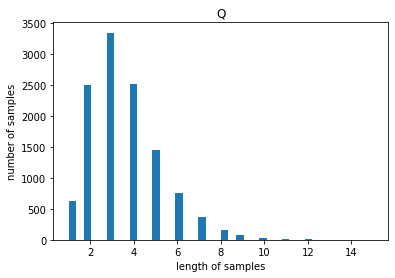

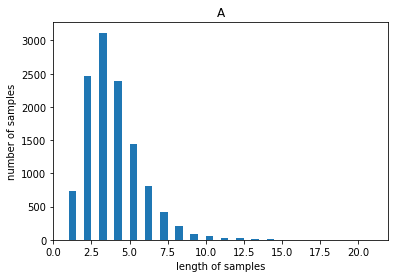

In [37]:
plt.title('Q')
plt.hist(Q_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('A')
plt.hist(A_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

=> A의 MAX를 10으로 해야겠다.

### 2. 데이터 전처리
---

**2.1 데이터 정리 : 결측치, 중복**

In [8]:
# NULL정리(확인)
print(data.isnull().sum(), '\n')

# 중복값 정리
data.drop_duplicates(keep='first')

print('전체 샘플수(중복값정리 전) :', (len(data_org)))
print('전체 샘플수(중복값정리 후) :', (len(data)))

Q        0
A        0
label    0
dtype: int64 

전체 샘플수(중복값정리 전) : 11823
전체 샘플수(중복값정리 후) : 11823


**2.2 데이터 전처리 : 불필요한 특수문자 제거 (평가문항 1 참고: 공백 및 특수문자 처리)**

In [9]:
# 전처리 함수
def preprocess_sentence(sentence):
  # 입력받은 sentence를 소문자로 변경하고 양쪽 공백을 제거
  sentence = sentence.lower().strip()  

  # 단어와 구두점(punctuation) 사이의 거리를 만듭니다.
  # 예를 들어서 "I am a student." => "I am a student ."와 같이
  # student와 온점 사이에 거리를 만듭니다.
  sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
  sentence = re.sub(r'[" "]+', " ", sentence)

  # (가나다, a-z, A-Z, ".", "?", "!", ",")를 제외한 모든 문자를 공백인 ' '로 대체합니다.
  sentence = re.sub(r"[^A-Za-z0-9가-힣]+", " ", sentence) 
  sentence = sentence.strip()

  # 다중공백 단일화  
  sentence = re.sub(r'[" "]+', " ", sentence)  
    
  # (ㅋ, ㅎ , ㅠ)정규화
  sentence = re.sub(r"ㅋ{2,}", "ㅋㅋ", sentence) # 연속된 'ㅋ'를 통일
  sentence = re.sub(r"ㅎ{2,}", "ㅎㅎ", sentence) # 연속된 'ㅎ'를 통일
  sentence = re.sub(r"ㅠ{2,}", "ㅠㅠ", sentence) # 연속된 'ㅠ'를 통일 
    
  return sentence


**3.2 병렬 데이터 구축 (질문과 답변 페어로 데이터 정리)**

In [10]:
# 병렬 데이터 구축 함수 (리스트로 반환)
def build_parallel_data(questions, answers):
    # 질문과 답변의 개수가 동일한지 확인
    if len(questions) != len(answers):
        print("Error: 질문과 답변의 수가 맞지 않습니다.")
        return None, None
    
    # 전처리된 질문과 답변 리스트 반환
    return questions, answers

In [11]:
# 전처리된 질문과 답변을 사용하여 병렬 데이터 생성
clean_Q = [preprocess_sentence(q) for q in data['Q']] # 전처리_질문 리스트
clean_A = [preprocess_sentence(a) for a in data['A']] # 전처리_답변 리스트

# 병렬 데이터 생성
questions, answers = build_parallel_data(clean_Q, clean_A)

**3.3 토크나이징 (SubwordTextEncoder 사용하여 한국어 병렬 데이터 구축)**

In [12]:
# TensorFlow Datasets SubwordTextEncoder를 사용한 토크나이저 생성 및 토큰화
import tensorflow_datasets as tfds
print("Vocabulary 생성 중...")

tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(questions + answers, target_vocab_size=2**13)

START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]
VOCAB_SIZE = tokenizer.vocab_size + 2
MAX_LENGTH = 40

# 질문과 답변을 토큰화하고 필터링 및 패딩
def tokenize_and_filter(inputs, outputs):
    tokenized_inputs, tokenized_outputs = [], []
    
    for (sentence1, sentence2) in zip(inputs, outputs):
        sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
        sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN

        if len(sentence1) <= MAX_LENGTH and len(sentence2) <= MAX_LENGTH:
            tokenized_inputs.append(sentence1)
            tokenized_outputs.append(sentence2)
    
    tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
        tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
    tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
        tokenized_outputs, maxlen=MAX_LENGTH, padding='post')
    
    return tokenized_inputs, tokenized_outputs

# questions, answers = tokenize_and_filter(questions, answers)
print("질문과 답변, 토큰화,필터링,패딩 함수 생성중...")

Vocabulary 생성 중...
질문과 답변, 토큰화,필터링,패딩 함수 생성중...


In [13]:
# 질문과 답변을 학습용과 테스트용으로 분리
train_questions, test_questions, train_answers, test_answers = train_test_split(
    questions, answers, test_size=0.2, random_state=42)

# 학습 데이터에 대해서는 tokenize_and_filter 적용
train_questions, train_answers = tokenize_and_filter(train_questions, train_answers)
test_questions, test_answers = tokenize_and_filter(test_questions, test_answers)

# 데이터셋 구성
BATCH_SIZE = 64
BUFFER_SIZE = 20000

# 교사 강요 (Teacher Forcing) for 훈련 dataset
train_dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': train_questions,
        'dec_inputs': train_answers[:, :-1]
    },
    {
        'outputs': train_answers[:, 1:]
    },
))
# 교사 강요 (Teacher Forcing) for 테스트 dataset
test_dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': test_questions,
        'dec_inputs': test_answers[:, :-1]
    },
    {
        'outputs': test_answers[:, 1:]
    },
))

train_dataset = train_dataset.cache()
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.batch(BATCH_SIZE)
train_dataset = train_dataset.prefetch(tf.data.experimental.AUTOTUNE)

test_dataset = test_dataset.batch(BATCH_SIZE)

# 4. 모델 구성하기
---

## 4.1 모델 구성요소

### **4.1.1 모델 구성요소 정의 : 패딩 및 마스킹 정의 (데이터 길이 균일화)**

In [14]:
# 패딩 마스킹(Padding Masking)
def create_padding_mask(x):
  mask = tf.cast(tf.math.equal(x, 0), tf.float32)
  # (batch_size, 1, 1, sequence length)
  return mask[:, tf.newaxis, tf.newaxis, :]
print("create_padding_mask")

create_padding_mask


In [15]:
# 룩 어헤드 마스킹(Look-ahead masking, 다음 단어 가리기)
def create_look_ahead_mask(x):
  seq_len = tf.shape(x)[1]
  look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
  padding_mask = create_padding_mask(x)
  return tf.maximum(look_ahead_mask, padding_mask)
print("create_look_ahead_mask")

create_look_ahead_mask


### **4.1.2 모델 구성요소 정의 : 레이어 PositionalEncoding**

In [16]:
# 포지셔널 인코딩 레이어
class PositionalEncoding(tf.keras.layers.Layer):

  def __init__(self, position, d_model):
    super(PositionalEncoding, self).__init__()
    self.pos_encoding = self.positional_encoding(position, d_model)

  def get_angles(self, position, i, d_model):
    angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
    return position * angles

  def positional_encoding(self, position, d_model):
    # 각도 배열 생성
    angle_rads = self.get_angles(
        position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
        i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
        d_model=d_model)

    # 배열의 짝수 인덱스에는 sin 함수 적용
    sines = tf.math.sin(angle_rads[:, 0::2])
    # 배열의 홀수 인덱스에는 cosine 함수 적용
    cosines = tf.math.cos(angle_rads[:, 1::2])

    # sin과 cosine이 교차되도록 재배열
    pos_encoding = tf.stack([sines, cosines], axis=0)
    pos_encoding = tf.transpose(pos_encoding,[1, 2, 0]) 
    pos_encoding = tf.reshape(pos_encoding, [position, d_model])

    pos_encoding = pos_encoding[tf.newaxis, ...]
    return tf.cast(pos_encoding, tf.float32)

  def call(self, inputs):
    return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

print("PositionalEncoding")

PositionalEncoding


###  **4.1.3 모델 구성요소 정의 : scaled_dot_product_attention, MultiHeadAttention**

In [17]:
# 스케일드 닷 프로덕트 어텐션 함수
def scaled_dot_product_attention(query, key, value, mask):
  # 어텐션 가중치는 Q와 K의 닷 프로덕트
  matmul_qk = tf.matmul(query, key, transpose_b=True)

  # 가중치를 정규화
  depth = tf.cast(tf.shape(key)[-1], tf.float32)
  logits = matmul_qk / tf.math.sqrt(depth)

  # 패딩에 마스크 추가
  if mask is not None:
    logits += (mask * -1e9)

  # softmax적용
  attention_weights = tf.nn.softmax(logits, axis=-1)

  # 최종 어텐션은 가중치와 V의 닷 프로덕트
  output = tf.matmul(attention_weights, value)
  return output

print("scaled_dot_product_attention")

scaled_dot_product_attention


In [18]:
class MultiHeadAttention(tf.keras.layers.Layer):

  def __init__(self, d_model, num_heads, name="multi_head_attention"):
    super(MultiHeadAttention, self).__init__(name=name)
    self.num_heads = num_heads
    self.d_model = d_model

    assert d_model % self.num_heads == 0

    self.depth = d_model // self.num_heads

    self.query_dense = tf.keras.layers.Dense(units=d_model)
    self.key_dense = tf.keras.layers.Dense(units=d_model)
    self.value_dense = tf.keras.layers.Dense(units=d_model)

    self.dense = tf.keras.layers.Dense(units=d_model)

  def split_heads(self, inputs, batch_size):
    inputs = tf.reshape(
        inputs, shape=(batch_size, -1, self.num_heads, self.depth))
    return tf.transpose(inputs, perm=[0, 2, 1, 3])

  def call(self, inputs):
    query, key, value, mask = inputs['query'], inputs['key'], inputs[
        'value'], inputs['mask']
    batch_size = tf.shape(query)[0]

    # Q, K, V에 각각 Dense를 적용합니다
    query = self.query_dense(query) # [[YOUR CODE]]
    key = self.key_dense(key) # [[YOUR CODE]]
    key = self.value_dense(key) # [[YOUR CODE]]

    # 병렬 연산을 위한 머리를 여러 개 만듭니다
    query =self.split_heads(query,batch_size) # [[YOUR CODE]]
    key =self.split_heads(key,batch_size) # [[YOUR CODE]]
    value =self.split_heads(value,batch_size) # [[YOUR CODE]]

    # 스케일드 닷 프로덕트 어텐션 함수
    scaled_attention = scaled_dot_product_attention(query, key, value, mask)

    scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

    # 어텐션 연산 후에 각 결과를 다시 연결(concatenate)합니다
    concat_attention = tf.reshape(scaled_attention,
                                  (batch_size, -1, self.d_model))

    # 최종 결과에도 Dense를 한 번 더 적용합니다
    outputs = self.dense(concat_attention)

    return outputs
print("MultiHeadAttention")

MultiHeadAttention


###  **4.1.4 인코더 및 디코더 구성**

**인코더 : 레이어 함수**

In [19]:
# 인코더 하나의 레이어를 함수로 구현.
# 이 하나의 레이어 안에는 두 개의 서브 레이어가 존재합니다.
def encoder_layer(units, d_model, num_heads, dropout, name="encoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")

  # 패딩 마스크 사용
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  # 첫 번째 서브 레이어 : 멀티 헤드 어텐션 수행 (셀프 어텐션)
  attention = MultiHeadAttention(
      d_model, num_heads, name="attention")({
          'query': inputs,
          'key': inputs,
          'value': inputs,
          'mask': padding_mask
      })

  # 어텐션의 결과는 Dropout과 Layer Normalization이라는 훈련을 돕는 테크닉을 수행
  attention = tf.keras.layers.Dropout(rate=dropout)(attention)
  attention = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(inputs + attention)

  # 두 번째 서브 레이어 : 2개의 완전연결층
  outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)

  # 완전연결층의 결과는 Dropout과 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention + outputs)

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)
print("encoder_layer")

encoder_layer


**인코더 : 인코더 함수**

In [20]:
def encoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name="encoder"):
  inputs = tf.keras.Input(shape=(None,), name="inputs")

  # 패딩 마스크 사용
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  # 임베딩 레이어
  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
  embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))

  # 포지셔널 인코딩
  embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  # num_layers만큼 쌓아올린 인코더의 층.
  for i in range(num_layers):
    outputs = encoder_layer(
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
        name="encoder_layer_{}".format(i),
    )([outputs, padding_mask])

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)
print("encoder")

encoder


**디코더 : 레이어 함수**

In [21]:
# 디코더 하나의 레이어를 함수로 구현.
# 이 하나의 레이어 안에는 세 개의 서브 레이어가 존재합니다.
def decoder_layer(units, d_model, num_heads, dropout, name="decoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
  enc_outputs = tf.keras.Input(shape=(None, d_model), name="encoder_outputs")
  look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name="look_ahead_mask")
  padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

  # 첫 번째 서브 레이어 : 멀티 헤드 어텐션 수행 (셀프 어텐션)
  attention1 = MultiHeadAttention(
      d_model, num_heads, name="attention_1")(inputs={
          'query': inputs,
          'key': inputs,
          'value': inputs,
          'mask': look_ahead_mask
      })

  # 멀티 헤드 어텐션의 결과는 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
  attention1 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention1 + inputs)

  # 두 번째 서브 레이어 : 마스크드 멀티 헤드 어텐션 수행 (인코더-디코더 어텐션)
  attention2 = MultiHeadAttention(
      d_model, num_heads, name="attention_2")(inputs={
          'query': attention1,
          'key': enc_outputs,
          'value': enc_outputs,
          'mask': padding_mask
      })

  # 마스크드 멀티 헤드 어텐션의 결과는
  # Dropout과 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
  attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)
  attention2 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention2 + attention1)

  # 세 번째 서브 레이어 : 2개의 완전연결층
  outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention2)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)

  # 완전연결층의 결과는 Dropout과 LayerNormalization 수행
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(outputs + attention2)

  return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)
print("decoder_layer")

decoder_layer


**디코더 : 디코더 함수**

In [22]:
def decoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name='decoder'):
  inputs = tf.keras.Input(shape=(None,), name='inputs')
  enc_outputs = tf.keras.Input(shape=(None, d_model), name='encoder_outputs')
  look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name='look_ahead_mask')

  # 패딩 마스크
  padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')
  
  # 임베딩 레이어
  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
  embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))

  # 포지셔널 인코딩
  embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

  # Dropout이라는 훈련을 돕는 테크닉을 수행
  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  for i in range(num_layers):
    outputs = decoder_layer(
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
        name='decoder_layer_{}'.format(i),
    )(inputs=[outputs, enc_outputs, look_ahead_mask, padding_mask])

  return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)
print("decoder")

decoder


## **4.2. 모델정의**
### 4.2.1 **트랜스포머 모델 구성하기 (입력 및 출력 차원 정의)**

In [23]:
def transformer(vocab_size,
                num_layers,
                units,
                d_model,
                num_heads,
                dropout,
                name="transformer"):
  inputs = tf.keras.Input(shape=(None,), name="inputs")
  dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")

  # 인코더에서 패딩을 위한 마스크
  enc_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='enc_padding_mask')(inputs)

  # 디코더에서 미래의 토큰을 마스크 하기 위해서 사용합니다.
  # 내부적으로 패딩 마스크도 포함되어져 있습니다.
  look_ahead_mask = tf.keras.layers.Lambda(
      create_look_ahead_mask,
      output_shape=(1, None, None),
      name='look_ahead_mask')(dec_inputs)

  # 두 번째 어텐션 블록에서 인코더의 벡터들을 마스킹
  # 디코더에서 패딩을 위한 마스크
  dec_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='dec_padding_mask')(inputs)

  # 인코더
  enc_outputs = encoder(
      vocab_size=vocab_size,
      num_layers=num_layers,
      units=units,
      d_model=d_model,
      num_heads=num_heads,
      dropout=dropout,
  )(inputs=[inputs, enc_padding_mask])

  # 디코더
  dec_outputs = decoder(
      vocab_size=vocab_size,
      num_layers=num_layers,
      units=units,
      d_model=d_model,
      num_heads=num_heads,
      dropout=dropout,
  )(inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])

  # 완전연결층
  outputs = tf.keras.layers.Dense(units=vocab_size, name="outputs")(dec_outputs)

  return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)


### 4.2.2 하이퍼파라미터 & 모델정의

In [24]:
tf.keras.backend.clear_session()

# 하이퍼파라미터 정의
num_layers =8   # 4
d_model =256    # 128
num_heads =8
units =1024     # 512
dropout = 0.1

# 트랜스포머 모델 정의
model = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=num_layers,
    units=units,
    d_model=d_model,
    num_heads=num_heads,
    dropout=dropout)

model.summary()

Model: "transformer"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, None)]       0                                            
__________________________________________________________________________________________________
dec_inputs (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
enc_padding_mask (Lambda)       (None, 1, 1, None)   0           inputs[0][0]                     
__________________________________________________________________________________________________
encoder (Functional)            (None, None, 256)    8412160     inputs[0][0]                     
                                                                 enc_padding_mask[0][0] 

### 5. 모델 학습
---

**5.0 학습용 데이터셋 분리 (훈련 및 검증 세트로 분리)**

**5.1 손실 및 정확도 함수**

In [25]:
# 손실 함수 (Custom Loss Function)
def loss_function(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
    
    loss = tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True, reduction='none')(y_true, y_pred)

    mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
    loss = tf.multiply(loss, mask)

    return tf.reduce_mean(loss)

# 커스텀 학습률 (Custom Learning Rate Schedule)
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()
        self.d_model = tf.cast(d_model, tf.float32)
        self.warmup_steps = warmup_steps

    def __call__(self, step):
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps ** -1.5)
        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)


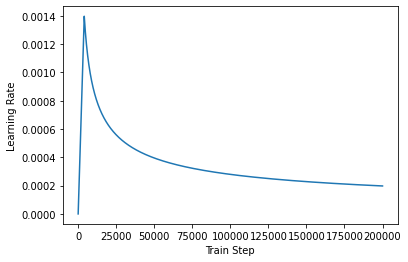

In [26]:
# 커스텀 학습률 시각화
sample_learning_rate = CustomSchedule(d_model=128)
plt.plot(sample_learning_rate(tf.range(200000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")
plt.show()

In [27]:
# 학습률 설정 및 옵티마이저 정의
learning_rate = CustomSchedule(d_model=128)
optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

# 정확도 메트릭 정의 (Accuracy)
def accuracy(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
    return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

**5.2 학습 과정에서 손실 및 정확도 모니터링 (평가문항 2 참고)**

In [28]:
# 모델 컴파일
model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])

## ***TRAIL #01*** : Epoch 40. 

In [29]:
# 모델 컴파일
# model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])

# 모델 학습
# EPOCHS = 40
# model.fit(train_dataset, epochs=EPOCHS, validation_data=test_dataset, verbose=1)

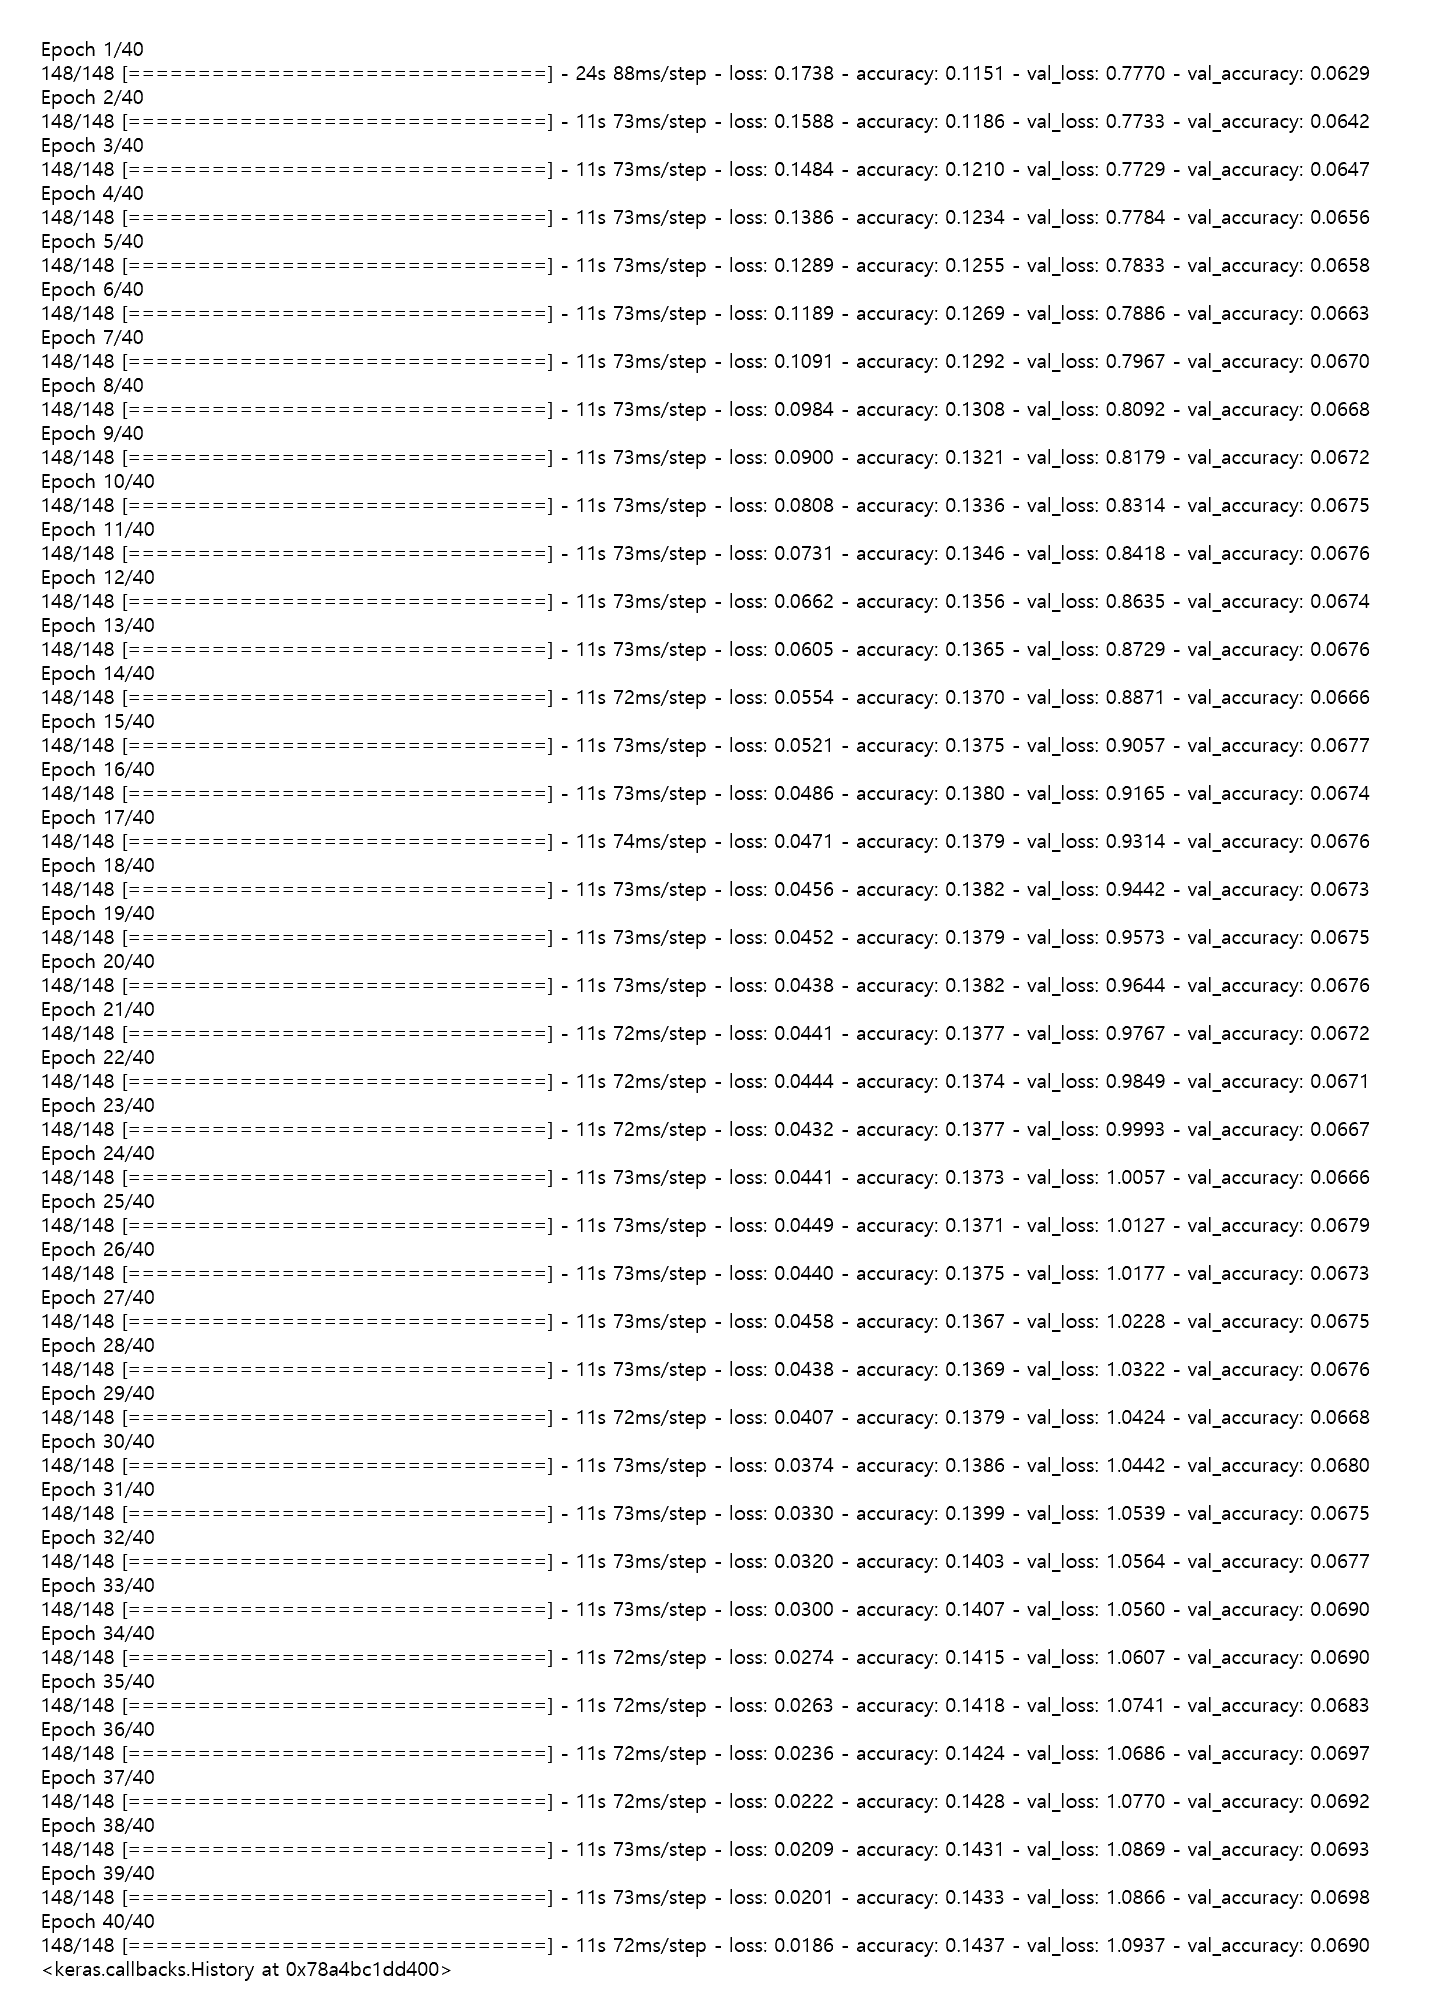

_TRAIL #01_  
🧐 **결과읽기 :**  
- Epoch 40에서 훈련 손실(loss: 0.0186)은 매우 낮다  
- 반면, 검증 손실(val_loss: 1.0937)은 상대적으로 높다  

- 학습 정확도(accuracy: 0.1437)는 매우 낮다  
- 검증 정확도(val_accuracy: 0.0690) 또한 매우 낮다  

-> 모델은 훈련 데이터에 너무 과하게 맞춰져 있지만, 검증 데이터에는 일반화되지 않는 상태  
=> 과적합 여부: YES  

✨ **ACTION :**  
for TRAIL #02  
=>........_"캐라스 얼리스탑 콜백 함수 추가하자!"_

## ***TRAIL #02*** : Epoch 40. EarlyStopping추가.

**#Early Stopping Callback 추가**
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)  
  
**#모델 학습**  
EPOCHS = 40  
history = model.fit(train_dataset, 
                    epochs=EPOCHS, 
                    validation_data=test_dataset, 
                    callbacks=[early_stopping], 
                    verbose=1)  


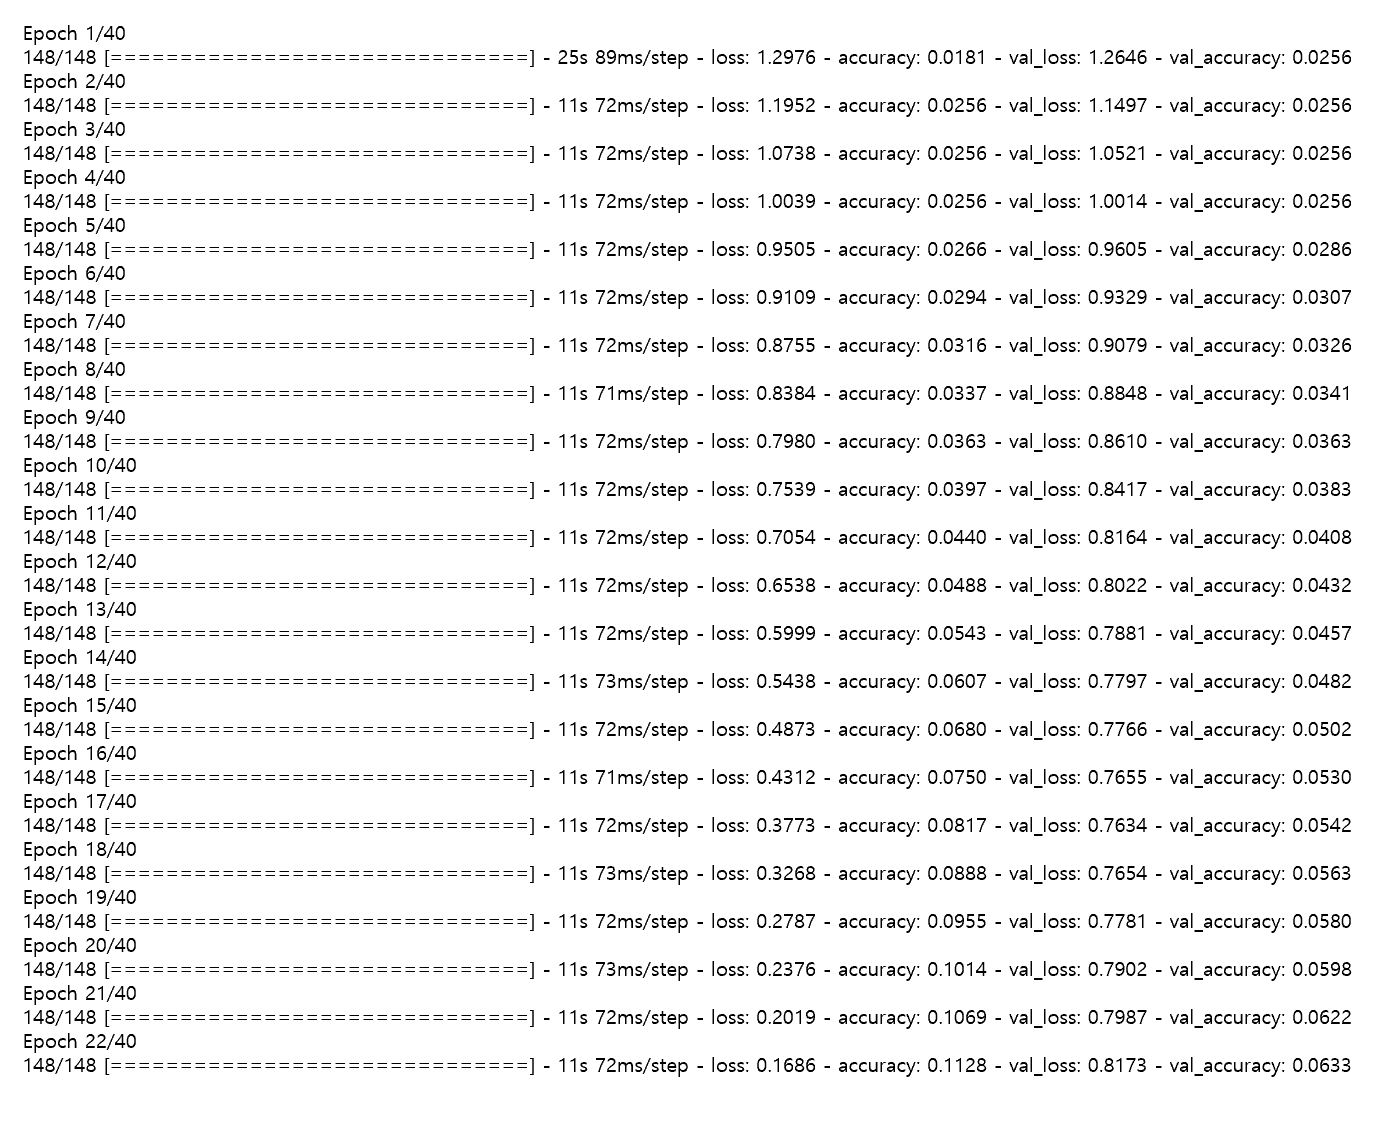

_TRAIL #02_  
🧐 **결과읽기 :**  


***TRAIL #01***
Epoch 40/40  
 - loss: 0.0186 - accuracy: 0.1437 - val_loss: 1.0937 - val_accuracy: 0.0690
***TRAIL #02***
Epoch 22/40
 - loss: 0.1686 - accuracy: 0.1128 - val_loss: 0.8173 - val_accuracy: 0.0633

-> 되려 결과가 근소하게 떨어졌다...! (얼리스탑핑 효과인듯)  
-> 모델이 충분히 복잡하지 않거나, 학습이 너무 빠르지 않았나 싶다.

✨ **ACTION for TRAIL #03**  
1. **Speed 캐라스 얼리스탑핑 patience 5->10**
2. **Complexity num_layers=4 -> 8, d_model=128-> 256, units=512->1024**

* FYI : d_model (모델 차원) , units (Feed Forward Network 내부 차원)

## ***TRAIL #03*** : Epoch 40. 하이퍼파라미퍼 변경
#### 하이퍼파라미퍼 변경내용 : EarlyStopping, 모델 차원(모델 차원), Feed Foward내부차원(units)

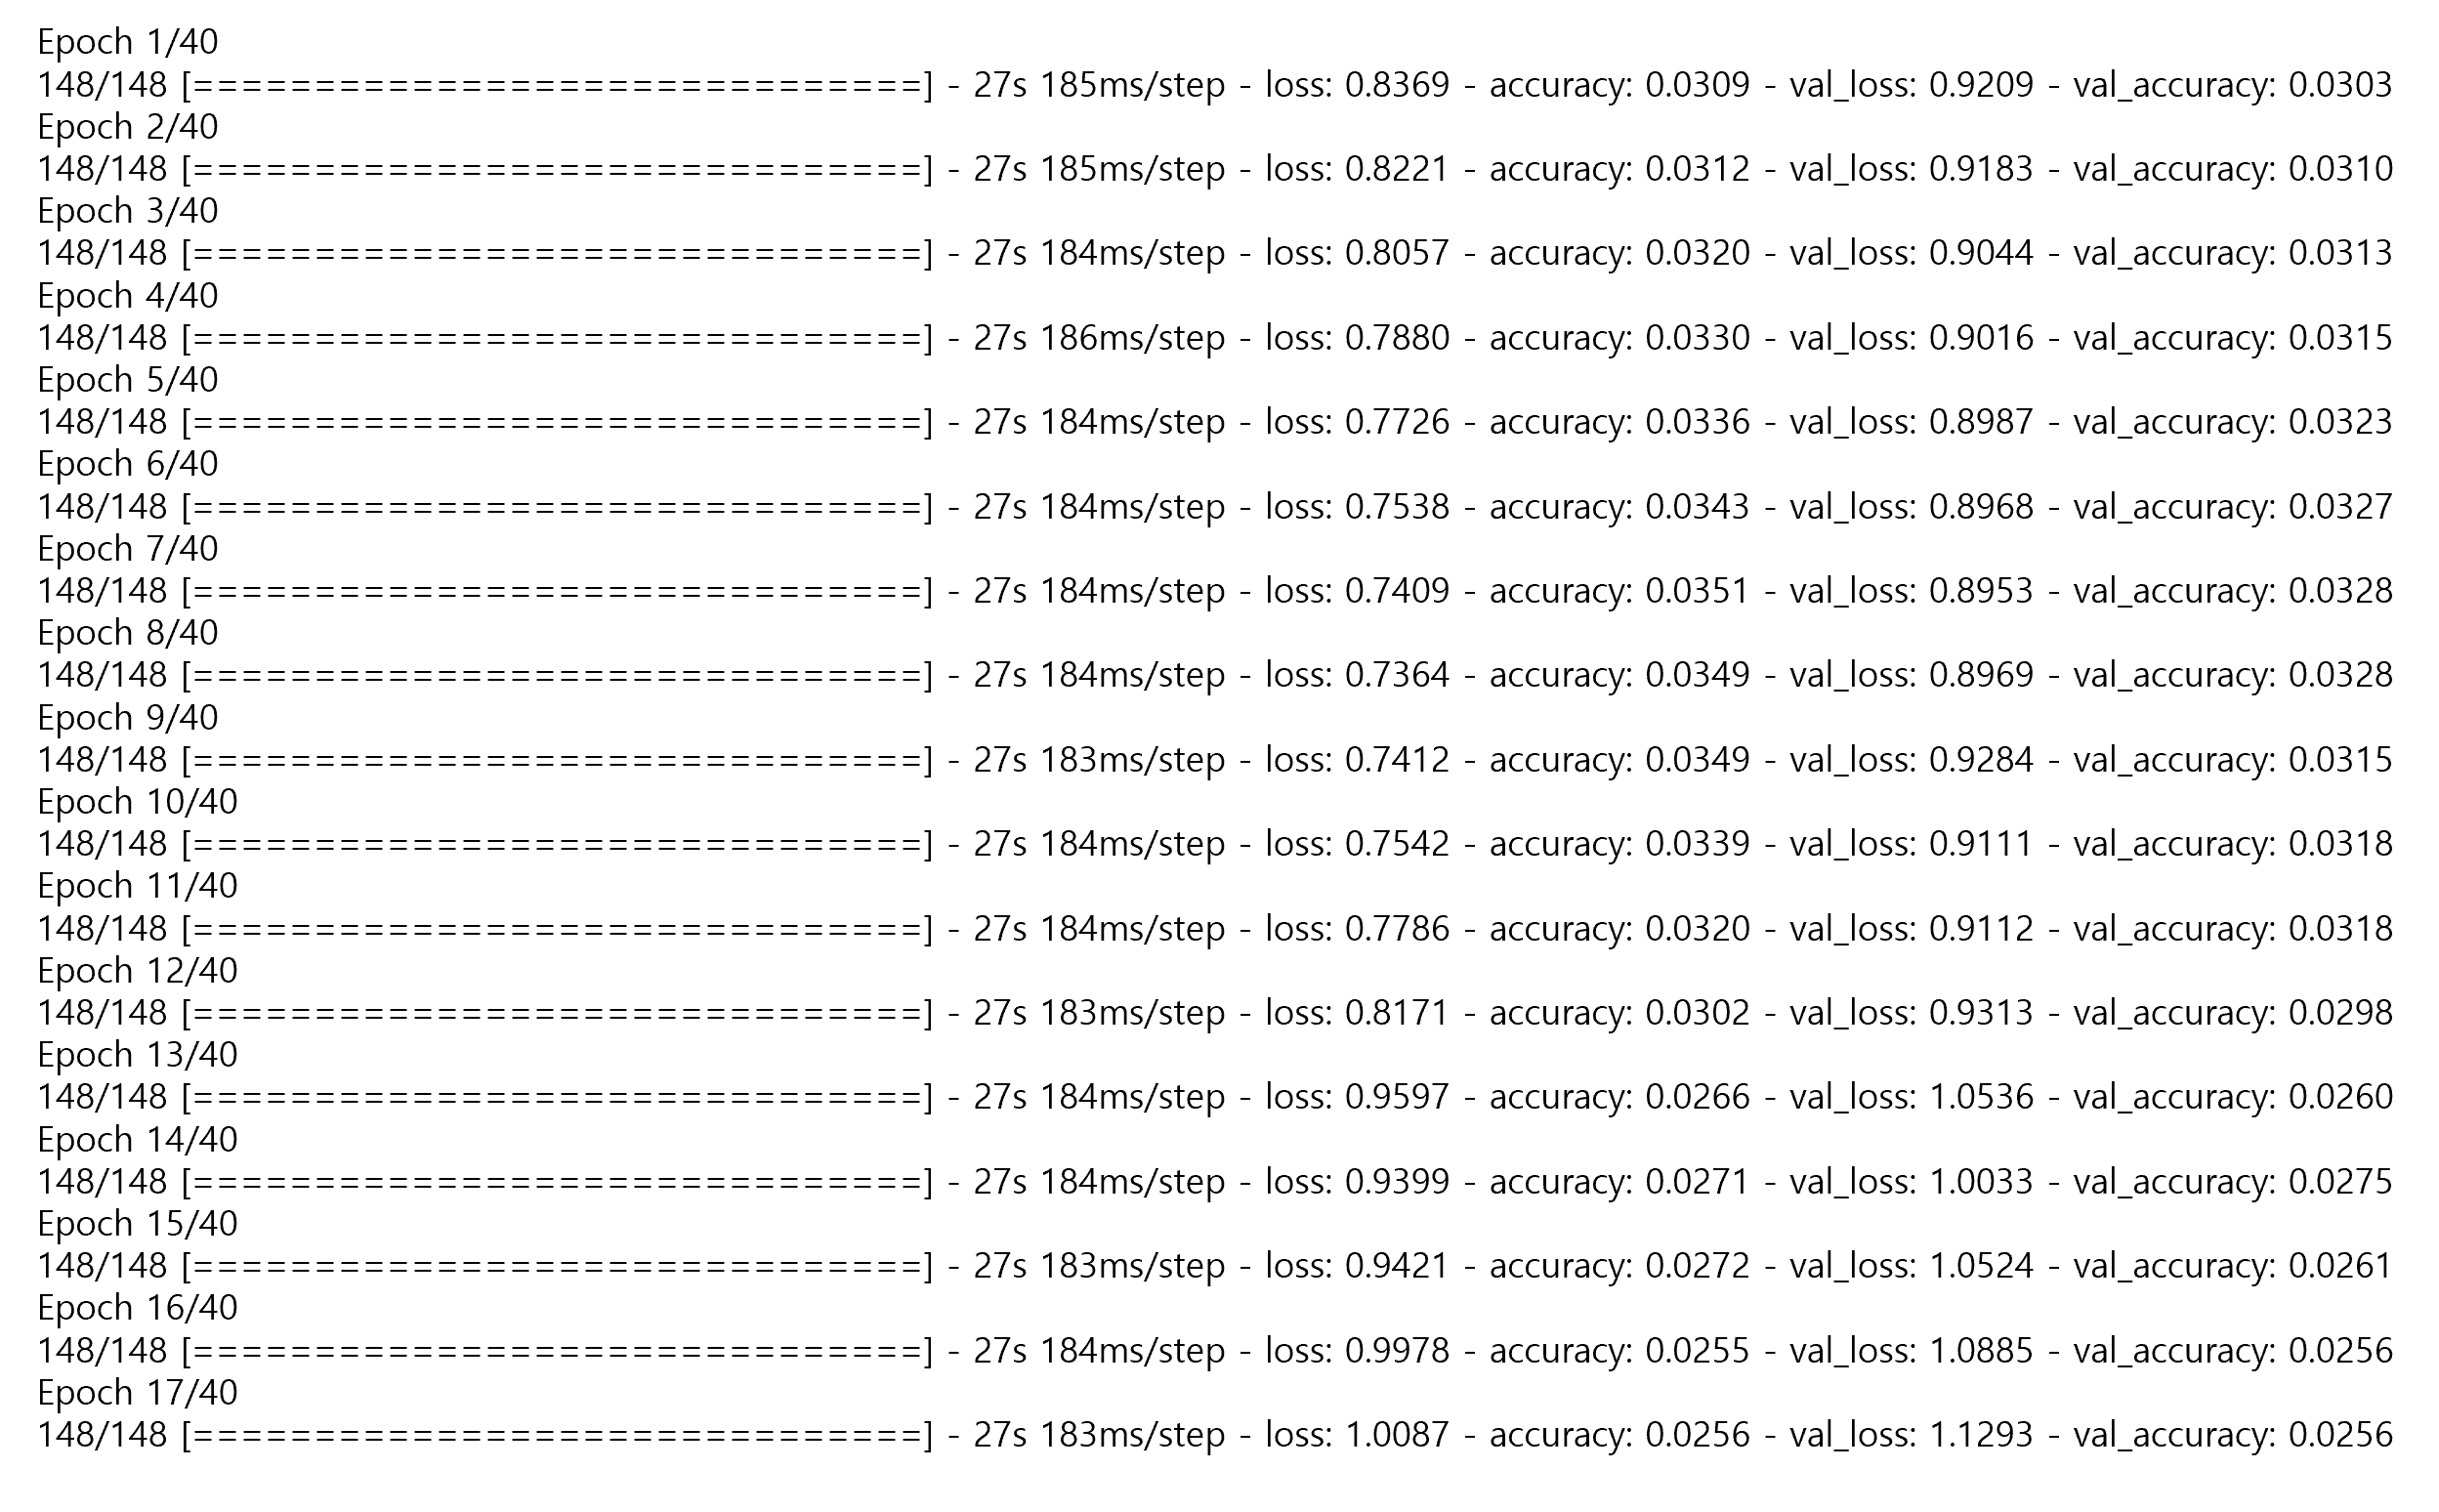

✨ **ACTION for TRAIL #04**  
1. **Speed 캐라스 얼리스탑핑 patience 10->5**


## ***TRAIL #04*** : Epoch 40. 하이퍼파라미퍼 변경_2
#### 하이퍼파라미퍼 변경내용 : --EarlyStopping(10->5)--, 모델 차원(모델 차원), Feed Foward내부차원(units)

In [35]:
# Early Stopping Callback 추가
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 모델 학습
EPOCHS = 40
history = model.fit(train_dataset, 
                    epochs=EPOCHS, 
                    validation_data=test_dataset, 
                    callbacks=[early_stopping], 
                    verbose=1)


Epoch 1/40
148/148 [==============================] - 27s 181ms/step - loss: 0.9157 - accuracy: 0.0279 - val_loss: 1.0259 - val_accuracy: 0.0277
Epoch 2/40
148/148 [==============================] - 27s 184ms/step - loss: 0.9942 - accuracy: 0.0263 - val_loss: 1.0533 - val_accuracy: 0.0238
Epoch 3/40
148/148 [==============================] - 27s 185ms/step - loss: 1.0141 - accuracy: 0.0255 - val_loss: 1.0992 - val_accuracy: 0.0256
Epoch 4/40
148/148 [==============================] - 27s 183ms/step - loss: 1.0051 - accuracy: 0.0258 - val_loss: 1.2305 - val_accuracy: 8.0230e-04
Epoch 5/40
148/148 [==============================] - 27s 183ms/step - loss: 0.9879 - accuracy: 0.0259 - val_loss: 1.2418 - val_accuracy: 7.5893e-04
Epoch 6/40
148/148 [==============================] - 27s 184ms/step - loss: 0.9824 - accuracy: 0.0259 - val_loss: 1.3121 - val_accuracy: 6.1799e-04


✨ **ACTION for TRAIL #04**  
1. **MAX_LENGTH=40 -> 10**


### 6. 모델 평가
---

**6.1 학습 완료 후 테스트 데이터셋을 통해 성능 평가 (평가문항 2 참고)**

In [33]:
def evaluate(sentence):
    # 입력 문장을 전처리
    sentence = preprocess_sentence(sentence)
    
    # 입력 문장을 토큰화하고, 시작과 끝 토큰 추가
    sentence = tf.expand_dims(START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0)

    # 인코더 입력
    enc_padding_mask = create_padding_mask(sentence)

    # 시작 토큰을 디코더의 첫 번째 입력으로 사용
    output = tf.expand_dims(START_TOKEN, 0)

    # 디코더가 종료 토큰을 예측하거나 최대 길이에 도달할 때까지 반복
    for i in range(MAX_LENGTH):
        # 예측을 위한 입력 준비 (인코더와 디코더에 넣어줌)
        predictions = model(inputs=[sentence, output], training=False)

        # 마지막 단어를 선택
        predictions = predictions[:, -1:, :]  # (batch_size, 1, vocab_size)

        # 예측한 단어의 ID
        predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

        # 종료 토큰을 예측하면 반복을 종료
        if tf.equal(predicted_id, END_TOKEN[0]):
            break

        # 예측한 단어를 출력에 추가
        output = tf.concat([output, predicted_id], axis=-1)

    # 예측된 토큰을 문장으로 변환
    predicted_sentence = tokenizer.decode([i for i in tf.squeeze(output, axis=0) if i < tokenizer.vocab_size])

    return predicted_sentence

# 예측을 위한 함수
def predict(sentence):
    prediction = evaluate(sentence)
    return prediction  

In [34]:
# TRAIL #04 테스트를 위한 문장 입력
test_sentence = "오늘 날씨가 어때?"
prediction = predict(test_sentence)
print(f'입력 문장: {test_sentence}')
print(f'예측된 답변: {prediction}')

입력 문장: 오늘 날씨가 어때?
예측된 답변: 제가 잘 싶어요


### TRAIL #02 테스트를 위한 문장 입력

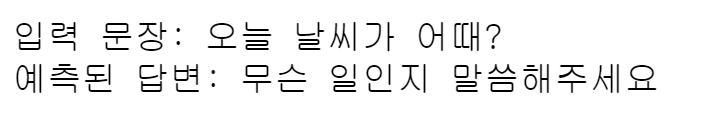

### TRAIL #03 테스트를 위한 문장 입력

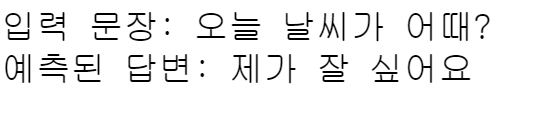

### TRAIL #04 테스트를 위한 문장 입력

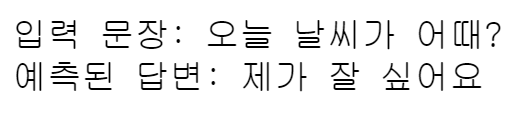